In [1]:
library(foreign)
set.seed(1)

read & scaling data

In [38]:
data <- data.matrix(read.dta("deaths.dta"))
data <- scale(data)
data[1:5,]

,year,deaths,teachers,pop
1,-1.673773,-2.065116,-2.343997,-1.778165
2,-1.595923,-1.895626,-2.156264,-1.679326
3,-1.518073,-1.570229,-2.029544,-1.576862
4,-1.440223,-1.500279,-1.945064,-1.480483
5,-1.362373,-1.457962,-1.776105,-1.382442


data split

In [17]:
ratio <- 0.2
n <- nrow(data)
sample <- sample.int(n = nrow(data), size = floor(ratio * n), replace = F)
data_test <- data[sample,]
data_train <- data[- sample,]

making wandermond matrix

In [12]:
make_wandermond <- function(x, p) {
    A <- 1
    for (k in 1 : p) {
        A <- cbind(A, x ^ k)
    }
    return(A)
}

lr

In [22]:
poly_lr <- function(cx, cy, p, filename="lr_plot.png") {
    # calc w
    A <- make_wandermond(data_train[, cx], p)
    At <- t(A)
    y <- data_train[, cy]
    w <- solve(At %*% A) %*% At %*% y
    # mse and sse
    A <- make_wandermond(data_test[, cx], p)
    y <- data_test[, cy]
    y_pred <- A %*% w
    SSE <- sum((y_pred - y) ^ 2)
    MSE <- mean((y_pred - y) ^ 2)
    # plot
    # png(filename)
    if (length(cx) == length(cy) && length(cx) == 1) {
        x <- data[, cx]
        y <- data[, cy]
        plot(x, y, xlab = cx, ylab = cy, col = "red", pch = 19)
        x <- seq(min(x), max(x), length = 1000)
        y <- make_wandermond(x, p) %*% w
        lines(x, y, col = "blue")
    }
    # dev.off()
    return(list("SSE" = SSE, "MSE" = MSE))
}

Попробуем найти зависимость смертей от количества учетелей. Начнем с метода наименьших квадратов, линейная зависимость:

[1] "SSE: 2.72536721348634 MSE: 0.340670901685792"


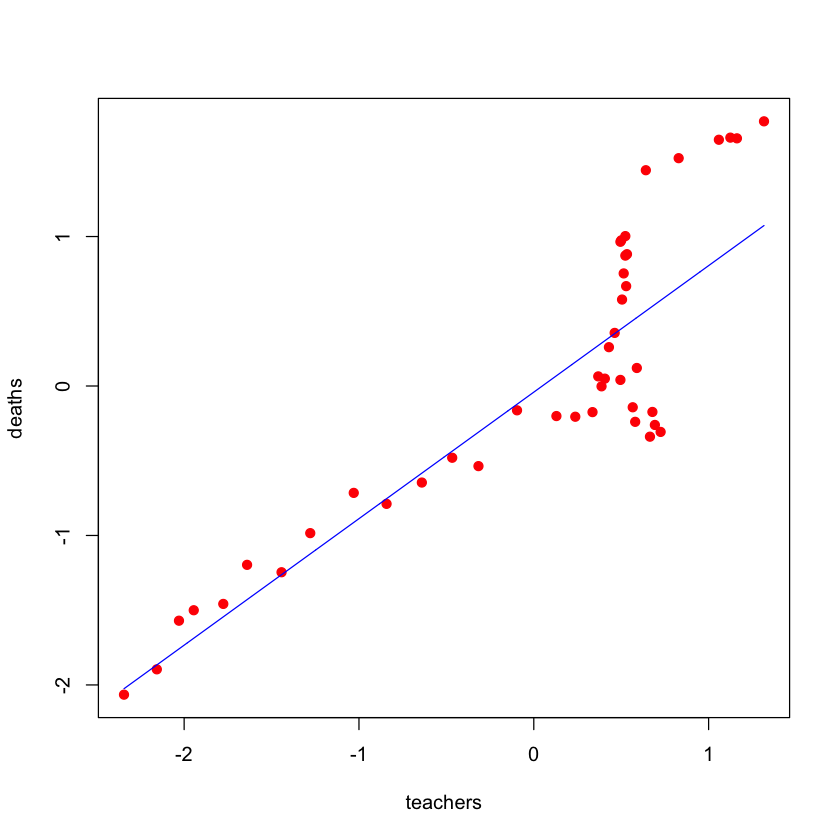

In [23]:
lr <- poly_lr(c("teachers"), c("deaths"), p = 1)
print(paste0("SSE: ", lr$SSE, " MSE: ", lr$MSE))

Неплохо, но можно лучше. Видно, что верхнее правое множество точек плохо приближается. Попробуем полиномиальную зависимость с deg = 2, 3, 4:

[1] "SSE: 2.49226461941417 MSE: 0.311533077426771"


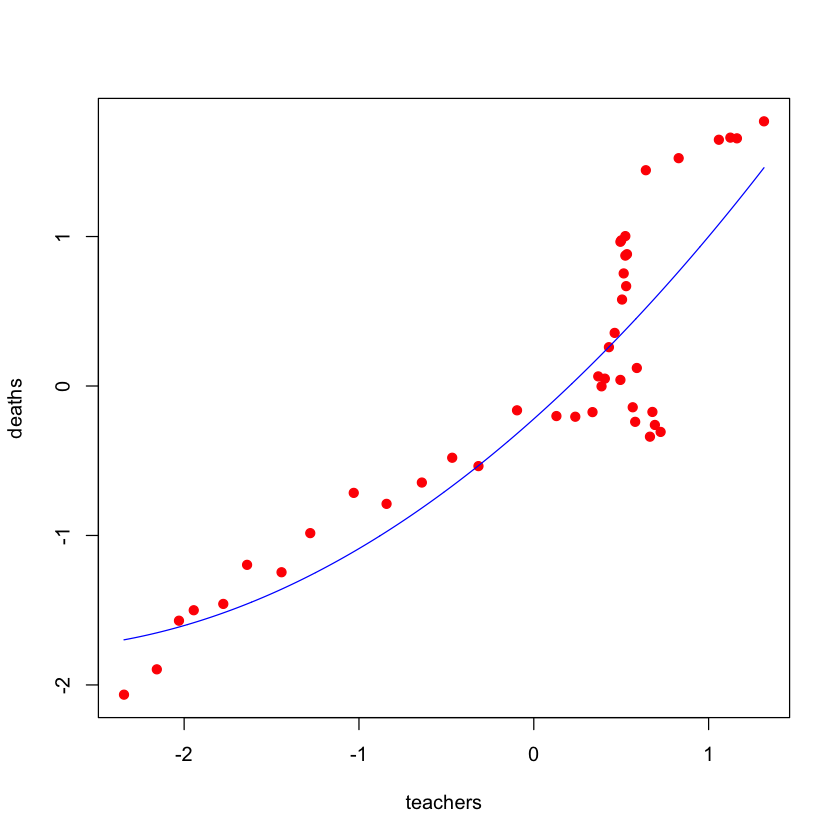

[1] "SSE: 2.3356256054265 MSE: 0.291953200678312"


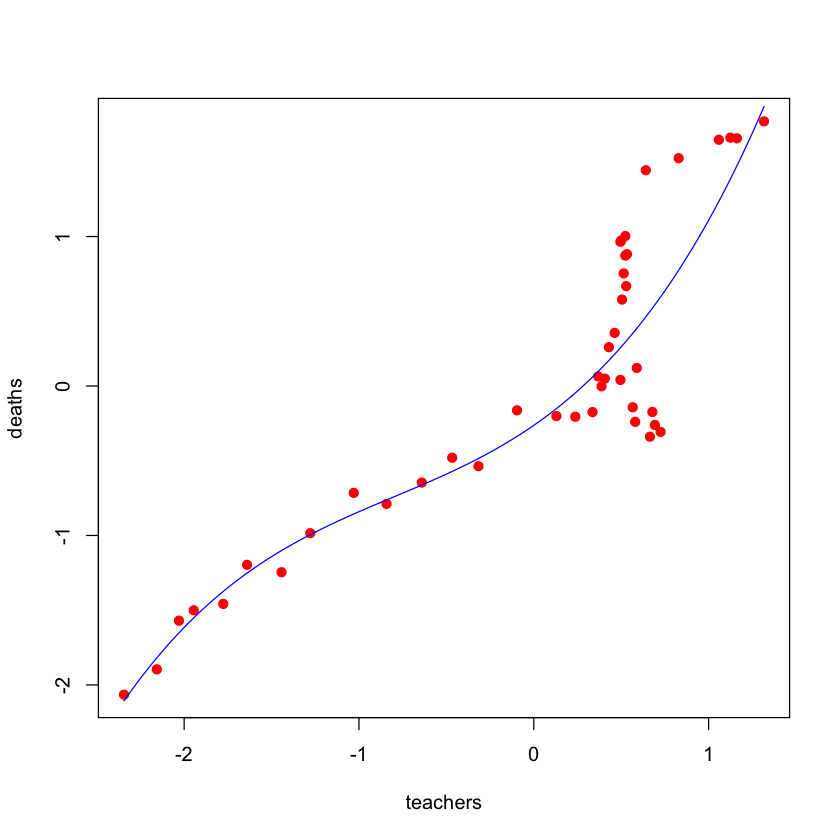

[1] "SSE: 2.37222211375701 MSE: 0.296527764219627"


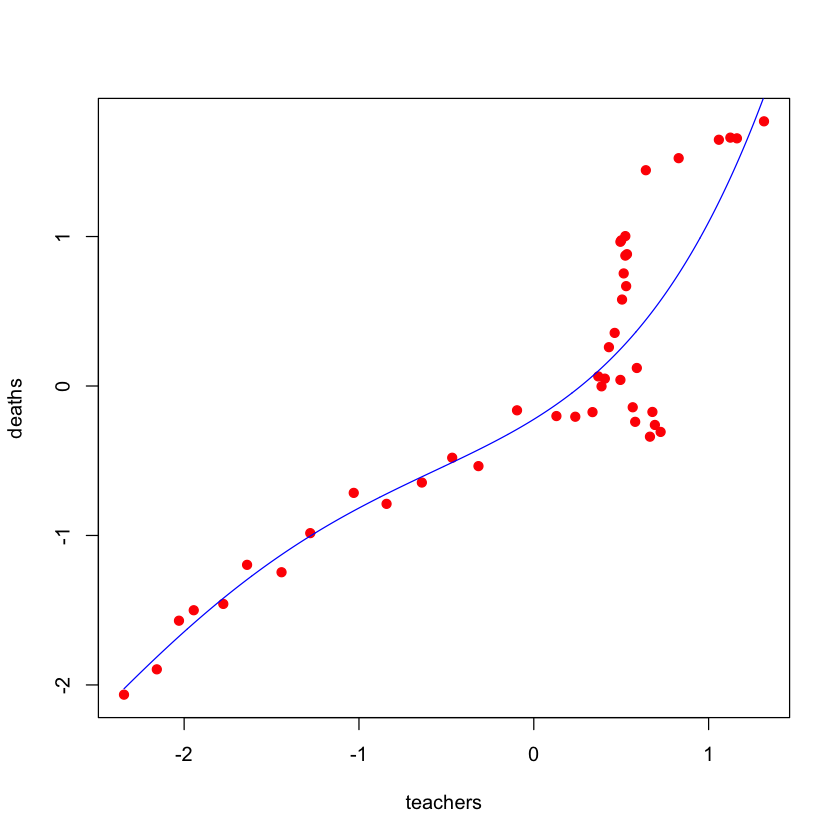

In [24]:
lr <- poly_lr(c("teachers"), c("deaths"), p = 2)
print(paste0("SSE: ", lr$SSE, " MSE: ", lr$MSE))
lr <- poly_lr(c("teachers"), c("deaths"), p = 3)
print(paste0("SSE: ", lr$SSE, " MSE: ", lr$MSE))
lr <- poly_lr(c("teachers"), c("deaths"), p = 4)
print(paste0("SSE: ", lr$SSE, " MSE: ", lr$MSE))

Ошибка уменьшается. А вот с p=4 уже хуже, чем с p=3. Итого p=3 - оптимальное.

Поробуем добавить в зависимость экономическое состояние (и подберем p):

In [34]:
lr <- poly_lr(c("teachers", "pop"), c("deaths"), p = 2)
print(paste0("SSE: ", lr$SSE, " MSE: ", lr$MSE))

[1] "SSE: 0.159439508513578 MSE: 0.0199299385641973"


Ошибка уменьшилась! А если добавить год:

In [37]:
lr <- poly_lr(c("year", "teachers", "pop"), c("deaths"), p = 3)
print(paste0("SSE: ", lr$SSE, " MSE: ", lr$MSE))

[1] "SSE: 0.212618316986144 MSE: 0.026577289623268"


Стало хуже. Итого: мы умеем хорошо предсказывать количество смертей по эконономическому состоянию и числу учителей (что достаточно логично).